## 1. Loading the dataset

In [1]:
# 0. import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
import itertools
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
# 1. Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url,names=names)
#to read the dataset from file (not internet connection), use dataset = pd.read_csv('path_to_the_dataset_folder/example_dataset.csv')


## 2. Explore and visualize the dataset

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0

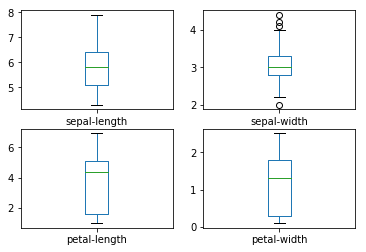

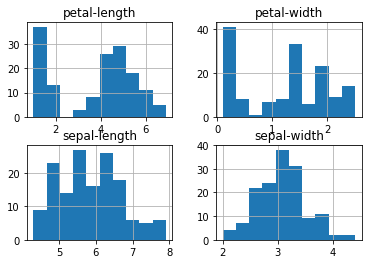

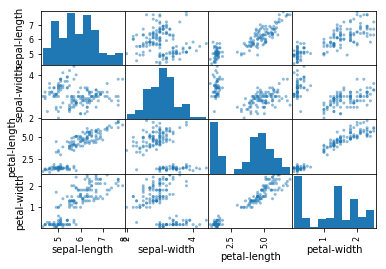

In [3]:
# 2.Explore dataset (source check https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)

# 2.1 visualize shape
print(dataset.shape)

# 2.2 Get a peek of the data
print(dataset.head(10))

# 2.3 Get Statistical Summary
print(dataset.describe())

# 2.4 Visualize Class Distribution
print(dataset.groupby('class').size())

# 2.5 plot data and relationships among variables

# 2.5.1 box and whisker plots
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()
# 2.5.2 histograms
dataset.hist()
plt.show()

# 2.5.3 scatter plot matrix
scatter_matrix(dataset)
plt.show()

### Question 1
Now that you had a look to the data, you can fill the following  information:

- Number of samples: *150*
- Number of classes: *3*
- Number of features: *4*
- Are there probable outliers? (yes/no & why): *yes, some points in the scatter matrix appear to be isolated from the groups.*

### Question 2
Is the Iris dataset balanced? (yes/no & why): *No, there is 50 samples per class. It is therefore balanced.*


In [4]:
# 4. Data preparation
# 4.1 Split the dataset in features and labels
X = dataset.loc[:,'sepal-length':'petal-width']
Y = dataset.loc[:,'class']
# 4.2 Split into train and test sets
test_size = 0.20
seed = 46
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=test_size,random_state=seed)

### Question 3
In your opinion, why do we fix the seed? : *It is useful when we want to reproduce the same results.*


In [14]:
# 5. Rescaling/normalization
# we suspect the presence of outliers, so we use the RobustScaler
# 5.1 calculate the scaler using only the training set
scaler_X = RobustScaler()

# 5.2 apply the scaler on the training set
X_train_scaled = scaler_X.fit_transform(X_train)

# 5.3 apply the scaler (calculated on the training set) also to the test set
X_test_scaled = scaler_X.transform(X_test)

## 5.4 in case of a Regression problem, you need to rescale also the Y
## scaler_y = RobustScaler()
## y_train_scaled = scaler_y.fit_transform(Y_train)
## y_test_scaled = scaler_y.transform(Y_test) 
# 5.5 [optional] check the new values after the rescaling
print(X_train_scaled.shape)
print(X_train_scaled[:10,:])

(120, 4)
[[ 0.30769231 -0.23529412 -0.02857143  0.        ]
 [ 0.69230769  0.70588235  0.37142857  0.56140351]
 [-0.53846154  1.88235294 -0.82857143 -0.70175439]
 [ 0.15384615 -1.88235294  0.17142857  0.14035088]
 [-0.15384615 -0.47058824  0.14285714  0.49122807]
 [-1.15384615  0.         -0.94285714 -0.84210526]
 [-0.69230769  0.23529412 -0.82857143 -0.84210526]
 [ 0.53846154  0.          0.4         0.63157895]
 [ 1.46153846 -0.47058824  0.65714286  0.49122807]
 [-0.07692308  3.29411765 -0.82857143 -0.63157895]]


### Question 4
Select one feature and plot the data before and after rescaling the dataset. *This rescaling dosen't change the shape of the histogram, however, it changes the values of the $x$ axis.*

Modify the previous code to use the “QuantileTransformer”and “MinMaxScaler” and plot again the data(hint: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py). Are these methods (QuantileTransformer, MinMaxScaler) a good alternative? Why?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29fa1d9c88>]],
      dtype=object)

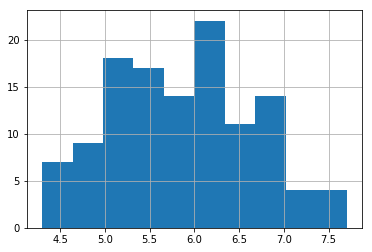

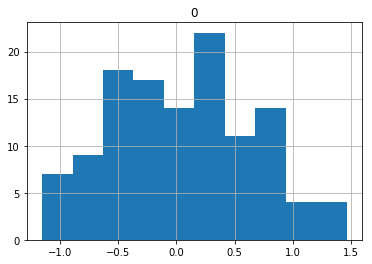

In [29]:
X_train['sepal-length'].hist()
pd.DataFrame(X_train_scaled[:,0]).hist()